In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import pickle
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv("Cleaned Car.csv")
df = df.drop(columns='Unnamed: 0', errors='ignore')


In [3]:
# Rename Price column to be consistent with other notebooks
df.rename(columns={'Price': 'selling_price'}, inplace=True)


In [4]:
# Prepare features and target
X = df.drop(columns=['selling_price'])
y = df['selling_price']


In [5]:
# Define categorical and numerical features
categorical_features = ['name', 'company', 'fuel_type']
numerical_features = ['year', 'kms_driven']


In [6]:
# Create preprocessor with scaling for numerical features
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])


In [7]:
# Create initial Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [8]:
# Split data with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the initial model
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('scaler', StandardScaler(),
                                                  ['year', 'kms_driven'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [11]:
# Evaluate the initial model
y_pred_initial = rf_pipeline.predict(X_test)
initial_r2 = r2_score(y_test, y_pred_initial)
print(f"Initial Random Forest model R2 score: {initial_r2:.4f}")


Initial Random Forest model R2 score: 0.5413


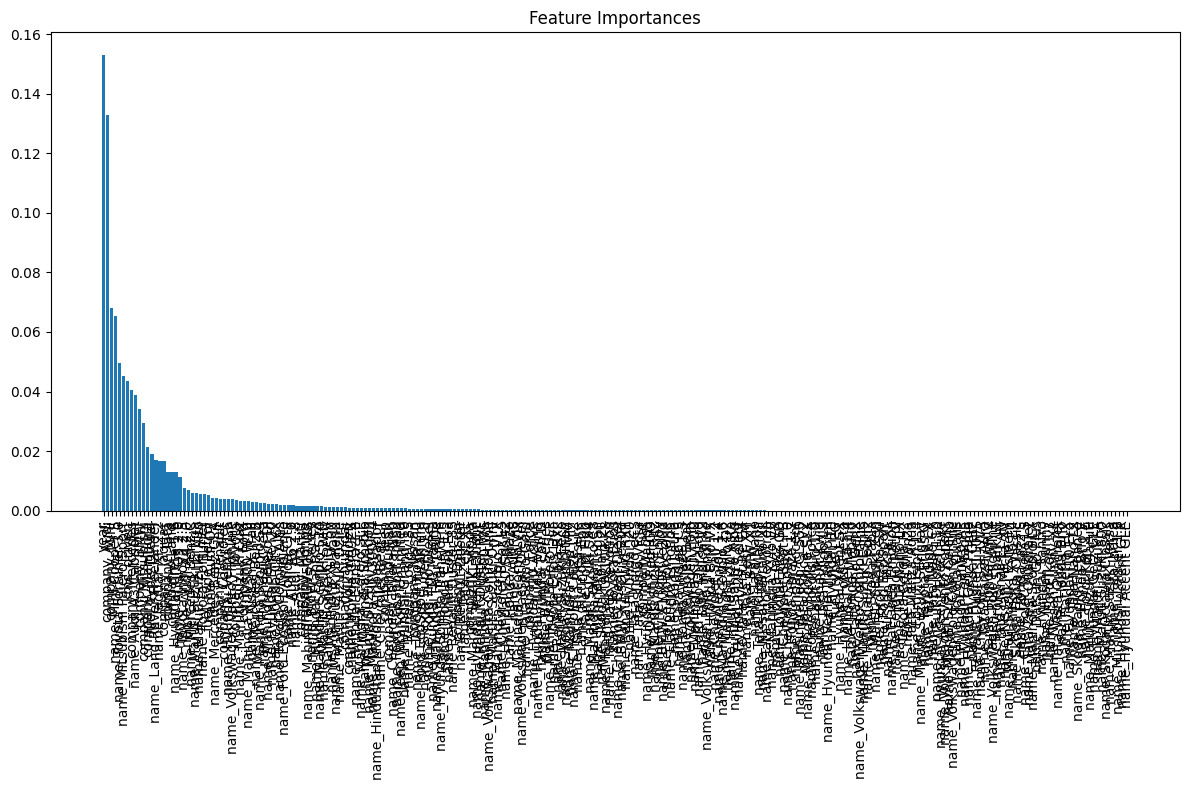

In [20]:

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


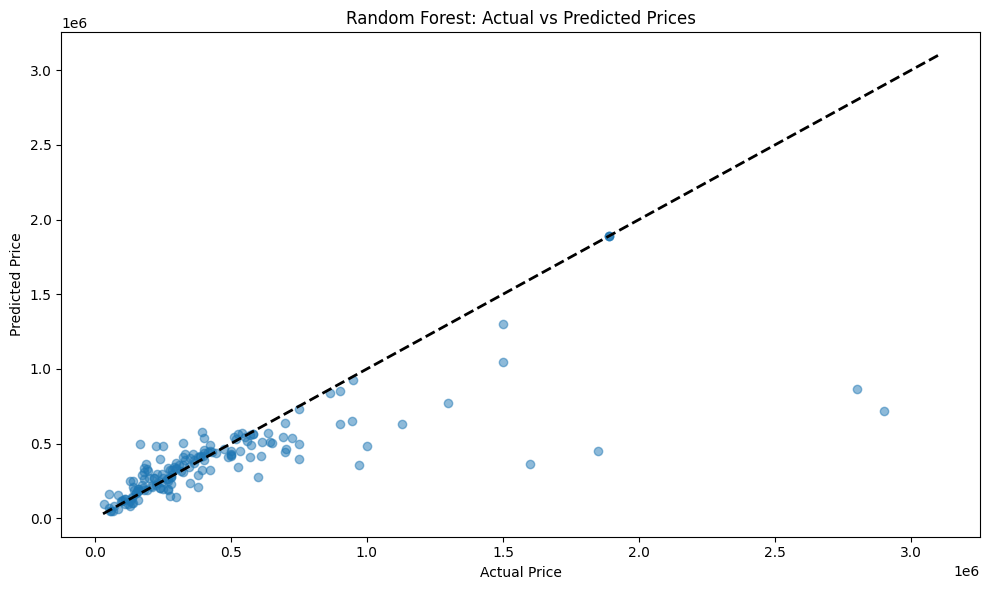

In [21]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.tight_layout()
plt.show()
